<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_guide_03_evaluation_Pima_Indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 피마 인디언 당뇨병 (Pima Indian Diabetes)

피마 인디언 당뇨병 데이터 세트를 이용해 당뇨병 여부를 판단하는 머신러닝 예측 모델을 수립

**피처 설명**
- Pregnancies : 임신횟수
- Glucose : 포도당 부하 검사 수치
- BloodPressure : 혈압 (mm Hg)
- SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin : 혈청 인슐린(mu U/ml)
- BMI : 체질량지수 ( 체중(kg) /(키(m))^2 )
- DiabetesPedigreeFunction : 당뇨 내력 가중치 값
- Age : 나이
- Outcome : 클래스 결정 값(0 또는 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/pima_indians_diabetes/diabetes.csv')
print(df['Outcome'].value_counts())

print(df.info())
df.head(5)

0    500
1    268
Name: Outcome, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# 피처 데이터 세트 X,  레이블 데이터 세트 y를 추출
# 맨 끝이 outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출
x = df.iloc[:, : -1] # Outcome 컬럼을 제외한 나머지 데이터 세트
y = df.iloc[:, -1] # Outcome 컬럼 세트

#print(x)
#print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

# print(x_train); print(y_train)

# 로지스틱 회귀로 학습 / 예측 및 평가 / 수행
lr = LogisticRegression()
lr.fit(x_train, y_train)
print('LR accuracy:', lr.score(x_train, y_train))

pred = lr.predict(x_test)
print('LR predict:', pred)

pred_proba = lr.predict_proba(x_test)[:, 1]
print('LR predict_proba:', lr.predict_proba(x_test)[:10]) # 10 개만 출력


LR accuracy: 0.7833876221498371
LR predict: [0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0
 1 1 0 0 0 0]
LR predict_proba: [[0.97821547 0.02178453]
 [0.79163561 0.20836439]
 [0.84505936 0.15494064]
 [0.50582404 0.49417596]
 [0.95477065 0.04522935]
 [0.4116655  0.5883345 ]
 [0.25591776 0.74408224]
 [0.79616368 0.20383632]
 [0.84896095 0.15103905]
 [0.84440563 0.15559437]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)

    print('\n오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\
            F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    


get_clf_eval(y_test, pred, pred_proba)



오차행렬
[[88 12]
 [23 31]]
정확도:0.7727, 정밀도:0.7209, 재현율:0.5741,            F1:0.6392, AUC:0.7919


Precision len: 155
precision sample:
 [0.35064935 0.34640523 0.34868421 0.34437086 0.34666667 0.34228188
 0.34459459 0.34693878 0.34931507 0.35172414]

 recall len: 155
recall sample:
 [1.         0.98148148 0.98148148 0.96296296 0.96296296 0.94444444
 0.94444444 0.94444444 0.94444444 0.94444444]

 thresholds len: 154
thresholds sample:
 [0.01673354 0.02178453 0.03585703 0.04204629 0.04522935 0.05199026
 0.05475594 0.05804775 0.05811191 0.06556401]
threshold_boundary: 154


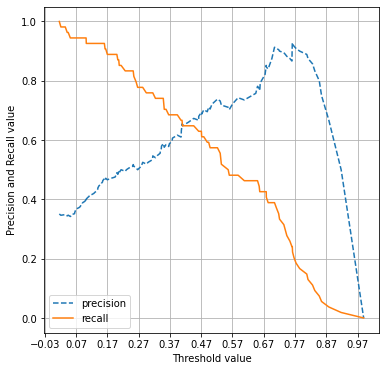

In [ ]:
# 임계값 및 정밀도와 재현율의 변화 확인을 위해 precision_recall_curve_plot() 함수 이용
pred_proba_c1 = lr.predict_proba(x_test)[:, 1]
#print(pred_proba_c1)
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba_c1)
print('Precision len:', len(precision))
print('precision sample:\n', precision[:10])
print('\n recall len:', len(recall))
print('recall sample:\n', recall[:10])
print('\n thresholds len:', len(thresholds))
print('thresholds sample:\n', thresholds[:10])

# ROC 곡선 그리기
# X 축을 thresholds 값, y 축은 정밀도, 재현율 값으로 각각 plot 수행
plt.figure(figsize=(6, 6)) # 이미지 사이즈 조정
threshold_boundary = thresholds.shape[0]
print('threshold_boundary:', threshold_boundary)
plt.plot(thresholds, precision[:threshold_boundary], linestyle='--', label='precision')
plt.plot(thresholds, recall[:threshold_boundary],    linestyle='solid', label='recall')

# thresholds 값 x 축의 scale을 0.1 단위로 변경
start, end = plt.xlim() # xlim() ??
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# x 축, y 축 label 과 legen, 그리고 각 grid 설정
plt.xlabel('Threshold value')
plt.ylabel('Precision and Recall value')
plt.legend()  #  그래프 상에 선 설명( -- : precision, solid: recall)
plt.grid() 
plt.show()


![pima-indian-precision-recall-curve](https://user-images.githubusercontent.com/291782/138658917-6f8f029b-e99d-49fa-ae4e-dd2dfc0e9a10.png)

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

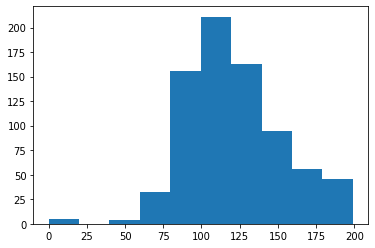

In [ ]:
# 위 precision recall 그래프를 봐도 정밀도 와 재현율이 임계값 0.42 정도에서 균형을 맞춤
# 하지만 두 지표 모두 0.7이 안되는 수치로 보임 (0.65 정도)
# 성능을 높여보자!

print(df.describe())

# describe() 값을 살펴보면 min() 값이 0 으로 되어 있는 피처가 많다.
# 예를들어 Glucose 는 포도당 수치인데 0 값은 말이 안됨
plt.hist(df['Glucose'], bins=10)



In [ ]:
# min() 값이 0으로 있는 피처에 대해 0값의 건수 및 전체 데이터 건수 대비 및 퍼센트의 비율 확인
# 0 값을 검사할 피처 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = df.Glucose.count()

# 피처별로 반복하면서 데이터 값이 0인 데이터 건수를 추출하고, 퍼센트 계산
for feature in zero_features :
    zero_count = df[df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [ ]:
# zero_feature 리스트 내부에 저장된 개별 피처들에 대해서 0 값을 평균으로 대체
mean_zero_features = df[zero_features].mean()
df[zero_features] = df[zero_features].replace(0, mean_zero_features)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
# 0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환
X = df.iloc[:, : -1]
y = df.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
sc = StandardScaler()
x_scaled = sc.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=111, stratify=y)

# 로지스틱 회귀로 학습, 예측 및 평가 수행
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)  # 정밀도는 0.7 이상으로 개선됨. 재현율이 0.5 정도로 개션이 필요함


오차행렬
[[89 11]
 [27 27]]
정확도:0.7532, 정밀도:0.7105, 재현율:0.5000,            F1:0.5870, AUC:0.7993


In [ ]:
# 임곗값 변화시키며 재현율 성능수치 확인
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr.predcit_proba(x_test)

# p.181 부터
부터
또 181 부터